In [1]:
import os
os.chdir('/home/megatron/work')

import megatron
import pandas as pd
import numpy as np

In [2]:
lahman = pd.read_csv('data/lahman/core/Batting.csv')

In [3]:
pd.set_option('display.max_columns', 500)
lahman.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
104319,zimmejo02,2017,1,DET,AL,29,6,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
104320,zimmery01,2017,1,WAS,NL,144,524,90,159,33,0,36,108.0,1.0,0.0,44,126.0,1.0,3.0,0.0,5.0,16.0
104321,zobribe01,2017,1,CHN,NL,128,435,58,101,20,3,12,50.0,2.0,2.0,54,71.0,2.0,2.0,2.0,3.0,13.0
104322,zuninmi01,2017,1,SEA,AL,124,387,52,97,25,0,25,64.0,1.0,0.0,39,160.0,0.0,8.0,0.0,1.0,8.0
104323,zychto01,2017,1,SEA,AL,45,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
G = megatron.Graph()
inputs = megatron.adapters.from_dataframe(lahman, G)
new_types = [np.str, np.int, np.int, np.str, np.str] + [np.int]*17

inputs = megatron.transforms.Impute({np.nan: 0}, name='fillna')(inputs)

for new_type, name in zip(new_types, inputs.names):
    inputs[name] = megatron.transforms.Retype(new_type)(inputs[name])

PA = megatron.transforms.Add(name='PA')(inputs[['AB', 'BB', 'HBP', 'SH', 'SF']])

BBp = megatron.transforms.Divide(name='BB%')([inputs['BB'], PA])

out = G.run(BBp, lahman, cache_result=False)
# some data is getting None'd here when it shouldn't be

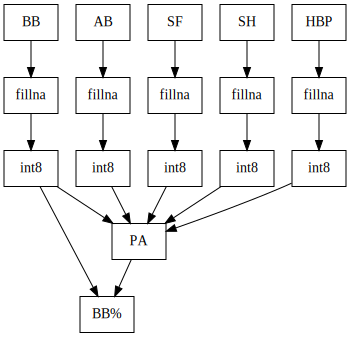

In [6]:
megatron.visuals.graph_imshow(G, BBp)